In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from mpl_toolkits.basemap import Basemap

In [2]:
data = pd.read_csv("./911_Calls_for_Service.csv")

In [3]:
data.head()

,callDateTime,priority,district,description,callNumber,incidentLocation,location
0,07/13/2015 10:41:00 AM,Medium,CD,SEE TEXT,P151941002,0 N CALVERT ST,"(39.2899299,-76.6123462)"
1,07/13/2015 10:47:00 AM,Medium,CD,911/NO VOICE,P151941003,600 E FAYETTE ST,"(39.2906737,-76.6071600)"
2,07/13/2015 10:42:00 AM,Medium,CD,911/NO VOICE,P151941004,200 E BALTIMORE ST,"(39.2898910,-76.6120720)"
3,07/13/2015 10:45:00 AM,Low,CD,PRKG COMPLAINT,P151941005,800 PARK AV,"(39.2985163,-76.6184754)"
4,07/13/2015 10:46:00 AM,Medium,SW,AUTO THEFT,P151941006,3500 CLIFTON AV,"(39.3112130,-76.6763150)"


In [4]:
data["callDateTime"][0]

'07/13/2015 10:41:00 AM'

In [158]:
s = data["callDateTime"][0]
def getWeekday(s):
    datetime_object = datetime.datetime.strptime(s, '%m/%d/%Y %I:%M:%S %p')
    return datetime_object.weekday()
def toDateTime(s):
    return datetime.datetime.strptime(s, '%m/%d/%Y %I:%M:%S %p')
def getTimeFrame(df, start, end):
    # Start and end should be Strings or date times
    if type(start) == str:
        start = makeDateTime(start)
    if type(end) == str:
        end = makeDateTime(end)
    # Incluseive start and end
    return df[(df["dateTime"] >= start) & (df["dateTime"] <= end)]
def makeDateTime(string):
    return datetime.datetime.strptime(string, "%m/%d/%Y")
def outside(string):
    if string == "narcoticsoutside":
        return "narcotics outside"
    return string

In [6]:
data["dateTime"] = data['callDateTime'].apply(lambda x: datetime.datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))

In [7]:
data["dayOfWeek"] = data['callDateTime'].apply(getWeekday)

In [21]:
data["description"] = data['description'].apply(lambda x:x.lower())

In [159]:
data["description"] = data['description'].apply(outside)

In [22]:
getTimeFrame(data,  "4/28/2015", "4/29/2015")

,callDateTime,priority,district,description,callNumber,incidentLocation,location,dateTime,dayOfWeek
4449,04/28/2015 10:26:00 AM,Low,ND,auto accident,P151181984,N HOWARD ST/W 0TH ST,"(39.319440,-76.619832)",2015-04-28 10:26:00,1
4450,04/28/2015 10:26:00 AM,NaN,SW,burglary,P151181985,WESTSIDE SHOPPING CENTER,"(39.283995,-76.654842)",2015-04-28 10:26:00,1
4451,04/28/2015 10:23:00 AM,Medium,ND,auto theft,P151181986,3400 GREENMOUNT AV,"(39.3300093,-76.6097318)",2015-04-28 10:23:00,1
4452,04/28/2015 10:27:00 AM,Low,NW,destruct propty,P151181987,3300 W COLD SPRING LN,"(39.3366870,-76.6746129)",2015-04-28 10:27:00,1
4453,04/28/2015 10:26:00 AM,Low,CD,destruct propty,P151181988,1700 BOLTON ST,"(39.3083830,-76.6282830)",2015-04-28 10:26:00,1
4666,04/28/2015 11:37:00 AM,Low,WD,hit and run,P151182254,200 N CAREY ST,"(39.2915864,-76.6383260)",2015-04-28 11:37:00,1
4667,04/28/2015 11:38:00 AM,NaN,SW,robbery armed,P151182255,3700 EDMONDSON AV,"(39.2941840,-76.6785430)",2015-04-28 11:38:00,1
4668,04/28/2015 11:37:00 AM,NaN,WD,armed person,P151182256,1800 APPLETON ST,"(39.3088590,-76.6492290)",2015-04-28 11:37:00,1
4669,04/28/2015 11:41:00 AM,Medium,CW,lab request,P151182257,5400 BELAIR RD,"(39.3386082,-76.5515396)",2015-04-28 11:41:00,1
4670,04/28/2015 11:39:00 AM,NaN,SW,larcency,P151182258,1000 POPLAR GROVE ST,"(39.2993010,-76.6655050)",2015-04-28 11:39:00,1


In [149]:
def createHistogram(df, column, title="Table", alphabetical=False, sortByNum=False, maxNum=-1):
    counter = Counter(df[column])
    if  sortByNum or maxNum != -1:
        if maxNum != -1:
            most_comm = Counter(df[column]).most_common(maxNum)
        else:
            most_comm = Counter(df[column]).most_common()
        result = {}
        for tup in most_comm:
            result[tup[0]] = tup[1]
        counter = result
    xs = counter.keys()
    ys = counter.values()
    if alphabetical:
        xs = sorted(counter.keys())
        ys = []
        for item in xs:
            ys.append(counter[item])
    xs = list(xs)
    for i in range(len(xs)):
        xs[i] = xs[i].title()
    indexes = np.arange(len(xs))
    width = 0.5
    plt.bar(indexes, ys, width)
    plt.xticks(indexes , xs, rotation="vertical")
    plt.title(title)
    plt.savefig(title + ".png", bbox_inches='tight')
    plt.show()

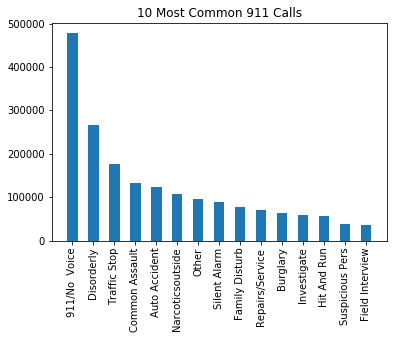

In [150]:
# df1 = getTimeFrame(data, "4/28/201", "4/29/2015")
# df2 = df1.loc[df1["priority"] == "High"]
createHistogram(data,"description",title = "10 Most Common 911 Calls", maxNum=15)

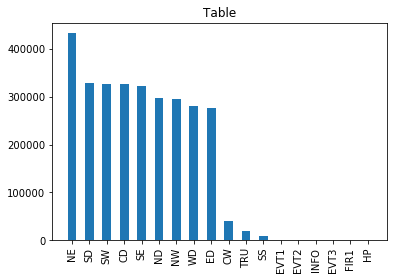

In [74]:
createHistogram(data, "district", sortByNum=True)

In [168]:
def createPoint(basemap, long=None, lati=None, color="r", alpha=0.5):
    if long != None:
        x,y = basemap(long,lati)
        basemap.scatter(x,y, color=color, alpha=alpha, zorder=2)
def parseLongLat(string):
    if len(string) > 3:
        temp = string[1:-1]
        li = temp.split(",")
        lat = float(li[0])
        lon = float(li[1])
        return (lon,lat)
    else:
        return (None,None)
def legendCreator(colordict, capitalize):
    result = []
    for k in colordict:
        if capitalize:
            result.append(mpatches.Patch(color=colordict[k], label=k.title()))
        else:
            result.append(mpatches.Patch(color=colordict[k], label=k))
    return result

3


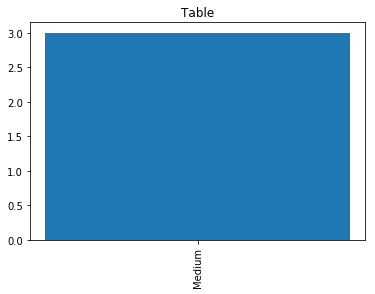

,callDateTime,priority,district,description,callNumber,incidentLocation,location,dateTime,dayOfWeek
2223166,11/28/2016 05:31:00 PM,Medium,ND,911/no voice,P163332109,2500 W BELVEDERE AV,"(39.3535492,-76.6668878)",2016-11-28 17:31:00,0
2238677,12/02/2016 05:01:00 PM,Medium,ND,911/no voice,P163372085,3300 N CHARLES ST,"(39.3276359,-76.6185319)",2016-12-02 17:01:00,4
2249041,12/05/2016 04:17:00 PM,Medium,NE,911/no voice,P163401825,3200 BELAIR RD,"(39.3207218,-76.5747566)",2016-12-05 16:17:00,0


In [151]:
df1 = getTimeFrame(data, "11/1/2016", "1/1/2017")
df2 = df1.loc[df1["description"].isin(["911/no voice"])]
print(len(df2))
createHistogram(df2,"priority",sortByNum=True)
df2.head()

In [17]:
stations = pd.read_csv('shapeFiles/Police_Stations.csv')
baseM = Basemap(
    llcrnrlon=-76.742721,
    llcrnrlat=39.17,
    urcrnrlon=-76.5, 
    urcrnrlat=39.4,
    projection='tmerc', 
    lat_0 = 39.299236, 
    lon_0 = -76.609383
)


In [170]:
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import matplotlib.patches as mpatches
import os
def plotGraph(dataframe, title, filename, colordict, column, alpha = 0.1, capitalize=True):
    plt.clf()
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    baseM = Basemap(
        llcrnrlon=-76.742721,
        llcrnrlat=39.17,
        urcrnrlon=-76.5, 
        urcrnrlat=39.4,
        projection='tmerc', 
        lat_0 = 39.299236, 
        lon_0 = -76.609383
    )
#     baseM.drawmapboundary(fill_color='white', zorder = -1)
    baseM.readshapefile("./shapeFiles/output", "baltimore", zorder = 0)
    baseM.readshapefile("./shapeFiles/PoliceDistricts", "pdDist", zorder = 2)
    # I converted the downloaded kml file to shp file using: 
        # ogr2ogr -f 'ESRI Shapefile' output.shp input.kml
    ## TODO, plot the points on the graph! I don't know where the points are being made, maybe the points are too small?
    ## to change: DF1 into a more filtered dataset.
    for index,row in dataframe.iterrows():
        lon,lat = parseLongLat(row["location"])
        if row[column] in colordict:
            createPoint(baseM, long=lon, lati=lat,color = colordict[row[column]], alpha = alpha)

    ## Plots Police Stations
    stationX,stationY = baseM(stations["X"].values,stations["Y"].values)
    baseM.scatter(stationX, stationY, s=100, marker="p", color="k", zorder=3)

    ## Plot Settings
    fig = plt.gcf()
    fig.set_size_inches(10.5, 10.5)

    ## Change this hard coded title?
    plt.title(title)
    ## Create Legends
    legends = legendCreator(colordict, capitalize)
    plt.legend(loc = "lower left", handles=legends)
    plt.savefig(filename, bbox_inches='tight')

In [174]:
listOfdates = []
year = "2015"
for i in range(1,13):
    listOfdates.append(str(i) + "/1/" + year)
year = "2016"
for i in range(1,13):
    listOfdates.append(str(i) + "/1/" + year)
listOfdates.append("1/1/2017")
print(listOfdates)
numToMonth = {"1":"January", "2":"February", "3":"March", "4":"April", "5":"May", "6":"June", "7":"July", "8":"August"
             , "9":"September", "10":"October", "11":"November", "12":"December"}

['1/1/2015', '2/1/2015', '3/1/2015', '4/1/2015', '5/1/2015', '6/1/2015', '7/1/2015', '8/1/2015', '9/1/2015', '10/1/2015', '11/1/2015', '12/1/2015', '1/1/2016', '2/1/2016', '3/1/2016', '4/1/2016', '5/1/2016', '6/1/2016', '7/1/2016', '8/1/2016', '9/1/2016', '10/1/2016', '11/1/2016', '12/1/2016', '1/1/2017']


In [175]:
# crime = ["911/no  voice", "No Voice"]
crime = ["narcotics inside", "narcotics outside", "narcotics onview", "Narcotics"]

fileOuts = []
districtsColors = {
        "NE":"#255E91",
        "SD":"#A5A5A5",
        "SW":"#FFC000",
        "CD":"#70AD47",
        "SE":"#636363",
        "ND":"#9E480E",
        "NW":"#ED7D31",
        "WD":"#5B9BD5",
        "ED":"#4472C4",
    }
priorityColors = {
        "High":"tab:red",
        "Medium":"tab:orange",
        "Low":"tab:cyan",
        "N/A":"tab:brown",
    }
narcoticsColors = {
        "narcotics inside":"tab:red",
        "narcotics outside":"tab:blue",
        "narcotics onview":"tab:green"
    }
noVoiceColors = {
    "911/no  voice":"tab:red"
}

for i  in range(1,len(listOfdates)):
    date = listOfdates[i-1]
    month = int(date.split("/")[0])
    year = date[-4:]
    df3 = getTimeFrame(data, listOfdates[i-1], listOfdates[i])
    df4 = df3.loc[df3["description"].isin(crime)]
    title = crime[len(crime)-1].title() + " calls in " + numToMonth[str(month)] + " for " + year
    saveFile = year + "/" + crime[1] + numToMonth[date.split("/")[0]] + ".png"
    plotGraph(df4, title, saveFile, districtsColors, "district",  alpha = 0.3, capitalize = False)
    fileOuts.append(saveFile)
    plt.cla()
    plt.clf()
    print(title)

Narcotics calls in January for 2015
Narcotics calls in February for 2015
Narcotics calls in March for 2015
Narcotics calls in April for 2015
Narcotics calls in May for 2015
Narcotics calls in June for 2015
Narcotics calls in July for 2015
Narcotics calls in August for 2015
Narcotics calls in September for 2015
Narcotics calls in October for 2015
Narcotics calls in November for 2015
Narcotics calls in December for 2015
Narcotics calls in January for 2016
Narcotics calls in February for 2016
Narcotics calls in March for 2016
Narcotics calls in April for 2016
Narcotics calls in May for 2016
Narcotics calls in June for 2016
Narcotics calls in July for 2016
Narcotics calls in August for 2016
Narcotics calls in September for 2016
Narcotics calls in October for 2016
Narcotics calls in November for 2016
Narcotics calls in December for 2016


In [176]:
import imageio
images = []
for filename in fileOuts:
    images.append(imageio.imread(filename))
imageio.mimsave("narcoticsByDistrict2.gif", images, duration=1)

In [162]:
tempFiles = fileOuts

In [165]:
newFileouts = fileOuts + tempFiles
print(newFileouts)

['2015/narcotics outsideJanuary.png', '2015/narcotics outsideFebruary.png', '2015/narcotics outsideMarch.png', '2015/narcotics outsideApril.png', '2015/narcotics outsideMay.png', '2015/narcotics outsideJune.png', '2015/narcotics outsideJuly.png', '2015/narcotics outsideAugust.png', '2015/narcotics outsideSeptember.png', '2015/narcotics outsideOctober.png', '2015/narcotics outsideNovember.png', '2015/narcotics outsideDecember.png', '2016/narcotics outsideJanuary.png', '2016/narcotics outsideFebruary.png', '2016/narcotics outsideMarch.png', '2016/narcotics outsideApril.png', '2016/narcotics outsideMay.png', '2016/narcotics outsideJune.png', '2016/narcotics outsideJuly.png', '2016/narcotics outsideAugust.png', '2016/narcotics outsideSeptember.png', '2016/narcotics outsideOctober.png', '2016/narcotics outsideNovember.png', '2016/narcotics outsideDecember.png']
